In [1]:
# understanding convolution layer
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def get_image(img_path, verbose=False):
    img = image.load_img(img_path, target_size=(150,150))
    return img

def get_processed_image(img_path, verbose=False):
    img = image.load_img(img_path, target_size=(150,150))
    image_array = image.img_to_array(img) # Converts a PIL Image instance to a NumPy array
    if(verbose):
        print(f"After PIL to numpy {image_array.shape}")
    image_array = np.expand_dims(image_array, axis=0)
    if(verbose):
        print(f"After expanding the dimension {image_array.shape}")
    image_array = image_array/255.0
    if(verbose):
        print(f"After conversion to per 255.0 {image_array.shape}")
    return image_array

def get_convolution_output(image_array, verbose=False):
    convolution_layer = Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")
    output = convolution_layer(image_array)
    if(verbose):
        print(f"After applying convolution {output.shape}")
    return output

def show_convolution_output(convolution_output, verbose=False):
    feature_maps = convolution_output[0]
    plt.figure(figsize=(20, 10))
    for i in range(feature_maps.shape[-1]):
        plt.subplot(4, 8, i+1)
        plt.imshow(feature_maps[:, :, i], cmap='gray')
        plt.axis('off')
        plt.title(f'Filter {i}')
    plt.tight_layout()
    plt.show()

def get_pooling_output(image_array, verbose=False):
    pooling_layer = MaxPool2D(pool_size=(2,2), strides=2, padding="valid")
    output = pooling_layer(image_array)
    if(verbose):
        print(f"After applying pooling {output.shape}")
    return output

def show_pooling_output(before_pooling_input, pooling_output, verbose=False):
   # Visualize one channel of input and output
    fig, axes = plt.subplots(2, 3, figsize=(10, 5))
    
    # Original RGB channels
    for i in range(3):
        axes[0, i].imshow(before_pooling_input[0, :, :, i], cmap='gray')
        axes[0, i].set_title(f"Input Channel {i}")
        axes[0, i].axis('off')
    
    # Pooled RGB channels
    for i in range(3):
        axes[1, i].imshow(pooling_output[0, :, :, i], cmap='gray')
        axes[1, i].set_title(f"Pooled Channel {i}")
        axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show() 

def get_flattened_output(image_array, verbose=False):
    flattened_layer = Flatten()
    output = flattened_layer(image_array)
    if(verbose):
        print(f"After flattening {output.shape}")
    return output

def get_dense_output(flattened_image_array, classes, verbose=False):
    dense_layer = Dense(units=classes, activation="relu")
    output = dense_layer(flattened_image_array)
    if(verbose):
        print(f"After a forward pass in a dense layer {output.shape}")
    return output

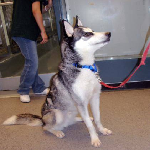

After PIL to numpy (150, 150, 3)
After expanding the dimension (1, 150, 150, 3)
After conversion to per 255.0 (1, 150, 150, 3)


2025-07-19 17:49:15.803748: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-07-19 17:49:15.803856: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2025-07-19 17:49:15.803872: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2025-07-19 17:49:15.804156: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-19 17:49:15.804219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


After applying convolution (1, 150, 150, 32)


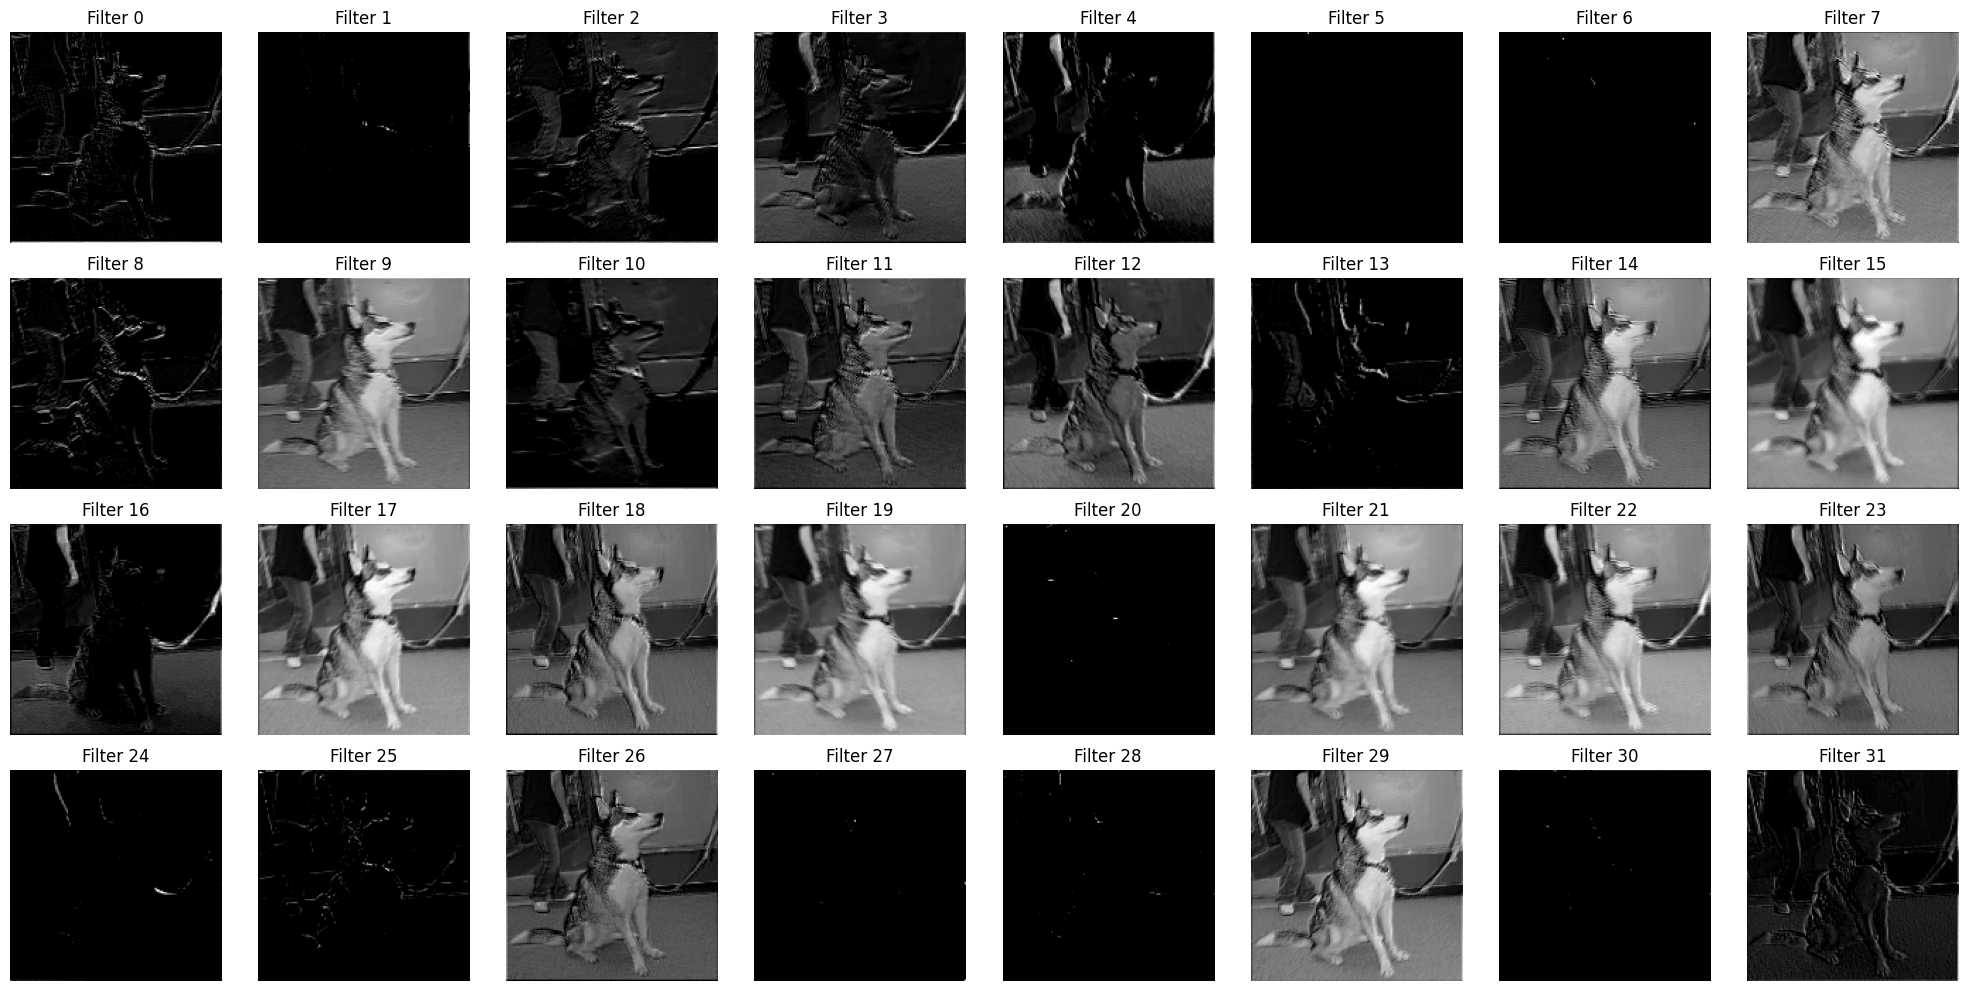

In [3]:
img_path = "/Users/suyashkumarsingh/projects/eye-for-blind/datasets/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"
img = get_image(img_path)
display(img)
processed_image = get_processed_image(img_path, True)
convolution_output = get_convolution_output(processed_image, True)
show_convolution_output(convolution_output, True)

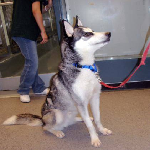

After PIL to numpy (150, 150, 3)
After expanding the dimension (1, 150, 150, 3)
After conversion to per 255.0 (1, 150, 150, 3)
After applying pooling (1, 75, 75, 3)


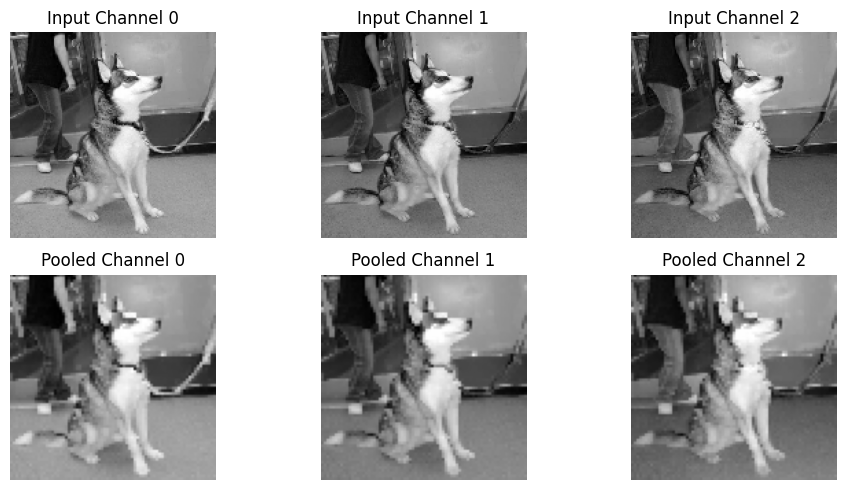

In [4]:
img_path = "/Users/suyashkumarsingh/projects/eye-for-blind/datasets/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"
img = get_image(img_path)
display(img)
processed_image = get_processed_image(img_path, True)
pooling_output = get_pooling_output(processed_image, True)
show_pooling_output(processed_image, pooling_output, True)

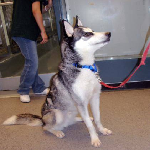

After PIL to numpy (150, 150, 3)
After expanding the dimension (1, 150, 150, 3)
After conversion to per 255.0 (1, 150, 150, 3)
After applying convolution (1, 150, 150, 32)
After applying pooling (1, 75, 75, 32)
After flattening (1, 180000)


In [5]:
img_path = "/Users/suyashkumarsingh/projects/eye-for-blind/datasets/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"
img = get_image(img_path)
display(img)
processed_image = get_processed_image(img_path, True)
convolution_output = get_convolution_output(processed_image, True)
pooling_output = get_pooling_output(convolution_output, True)
flattened_output = get_flattened_output(pooling_output, True)


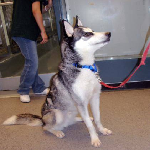

After PIL to numpy (150, 150, 3)
After expanding the dimension (1, 150, 150, 3)
After conversion to per 255.0 (1, 150, 150, 3)
After applying convolution (1, 150, 150, 32)
After applying pooling (1, 75, 75, 32)
After flattening (1, 180000)
After a forward pass in a dense layer (1, 128)
After a forward pass in a dense layer (1, 2)


In [6]:
img_path = "/Users/suyashkumarsingh/projects/eye-for-blind/datasets/cat-and-dog/test_set/test_set/dogs/dog.4001.jpg"
img = get_image(img_path)
display(img)
processed_image = get_processed_image(img_path, True)
convolution_output = get_convolution_output(processed_image, True)
pooling_output = get_pooling_output(convolution_output, True)
flattened_output = get_flattened_output(pooling_output, True)
dense_output = get_dense_output(flattened_output, 128, True)
classification_output = get_dense_output(dense_output, 2, True)

In [33]:
# model creation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Input(shape=(150,150,3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # for binary classification (cats vs dogs)
])

In [34]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory="../datasets/cat-and-dog/training_set/training_set",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    directory="../datasets/cat-and-dog/test_set/test_set",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


/Users/suyashkumarsingh/.pyenv/versions/3.11.11/envs/eye-for-blind/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.5340 - loss: 0.7381 - val_accuracy: 0.6761 - val_loss: 0.5996
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - accuracy: 0.6875 - loss: 0.7069

/Users/suyashkumarsingh/.pyenv/versions/3.11.11/envs/eye-for-blind/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6875 - loss: 0.7069 - val_accuracy: 0.6771 - val_loss: 0.5996
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.6783 - loss: 0.5921 - val_accuracy: 0.7252 - val_loss: 0.5546
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6250 - loss: 0.6491 - val_accuracy: 0.7267 - val_loss: 0.5567
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7259 - loss: 0.5417 - val_accuracy: 0.7188 - val_loss: 0.5410
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7500 - loss: 0.5637 - val_accuracy: 0.7242 - val_loss: 0.5316
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.7720 - loss: 0.4783 - val_accuracy: 0.7520 - val_loss: 0.5167
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 0.5087 - val_accuracy: 0.7470 - val_loss: 0.5216
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.8010 - loss: 0.4390 - val_accuracy: 0.777

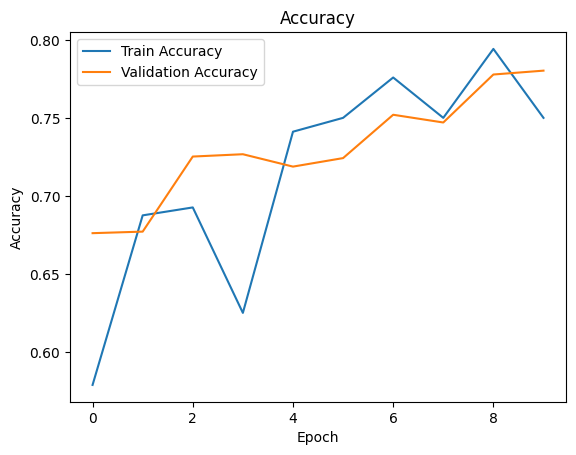

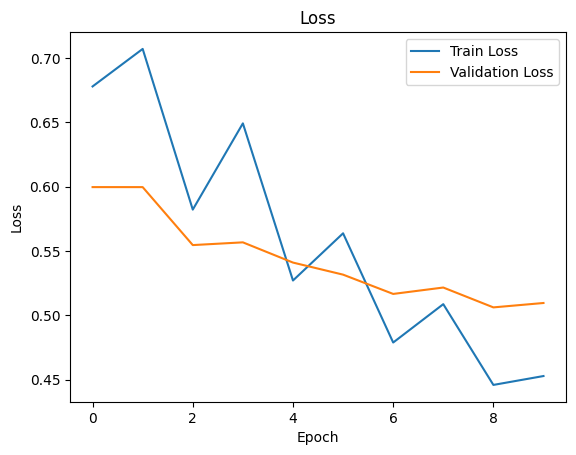

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples//test_generator.batch_size
)

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
def get_prediction(img_path, prediction_model, verbose=False):
    display(get_image(img_path))
    img_array = get_processed_image(img_path)
    prediction = prediction_model.predict(img_array)
    if(verbose):
        print(prediction[0][0])
    return "dog" if prediction[0][0] > 0.5 else "cat"

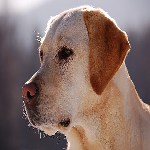

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'dog'

In [41]:
img_path = "../datasets/cat-and-dog/Labrador Retriever Portrait.jpg"
get_prediction(img_path, model)